<a href="https://colab.research.google.com/github/Da23849156/PING-HAN-TSAI/blob/master/transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 讀取套件

In [0]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as sf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, GlobalAveragePooling2D, Activation,MaxPooling2D,MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam

## 讀取資料+建立類別名稱
首先我使用的是fasion_mnist的資料庫
（總共有10個類別）

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##資料處理
包含建立validation dataset

In [0]:
x_valid=x_train[:6000]/255
y_valid=y_train[:6000]
x_train_new=x_train[6000:]/255
y_train_new=y_train[6000:]
y_train_new = to_categorical(y_train_new, 10)
y_valid=to_categorical(y_valid,10)
y_test = to_categorical(y_test, 10)
x_train_new=x_train_new.reshape(54000,28,28,1)
x_test_new=x_test.reshape(10000,28,28,1)/255
x_valid=x_valid.reshape(6000,28,28,1)

## 建立fashion_mnist 模型
分成建立C_layer跟F_layer兩個變數，以涵括Conv2D相關程式和Dense相關程式

In [0]:
C_layer=[Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
          MaxPooling2D((2, 2)),
          Flatten()]
F_layer=[Dense(100, activation='relu', kernel_initializer='he_uniform'),
         Dense(10, activation='softmax')]
model = Sequential(C_layer+F_layer)

## 檢視模型架構

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


## 訓練模型



In [0]:
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

response=model.fit(x_train_new,y_train_new,batch_size=128,epochs=5,validation_data=(x_valid,y_valid))

Epoch 1/5
422/422 [==============================] - 20s 47ms/step - loss: 0.7037 - accuracy: 0.7630 - val_loss: 0.5018 - val_accuracy: 0.8342
Epoch 2/5
422/422 [==============================] - 20s 47ms/step - loss: 0.4849 - accuracy: 0.8316 - val_loss: 0.4687 - val_accuracy: 0.8340
Epoch 3/5
422/422 [==============================] - 20s 48ms/step - loss: 0.4364 - accuracy: 0.8469 - val_loss: 0.4139 - val_accuracy: 0.8600
Epoch 4/5
422/422 [==============================] - 20s 48ms/step - loss: 0.4110 - accuracy: 0.8560 - val_loss: 0.4043 - val_accuracy: 0.8630
Epoch 5/5
422/422 [==============================] - 20s 48ms/step - loss: 0.3919 - accuracy: 0.8637 - val_loss: 0.4369 - val_accuracy: 0.8473


## 儲存模型

In [0]:
model.save('my_model.h5')

## 模型評估

In [0]:
score = model.evaluate(x_test_new, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4532 - accuracy: 0.8390


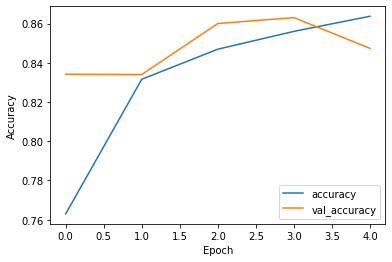

In [0]:
plt.plot(response.history['accuracy'], label='accuracy')
plt.plot(response.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

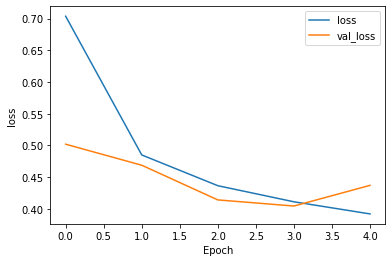

In [0]:
plt.plot(response.history['loss'], label='loss')
plt.plot(response.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

## 模型一結果
> **Train accuracy**： 86%

> **Validation accuracy**： 84%

> **Test accuracy**： 84%

根據結果顯示，本模型正確率約為85%左右，尚可。不過有一點overfitting的情況。

# **Transfer learning**

## 使用新的資料集mnsit

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


## 資料處理
在這邊就不額外建立validation set

In [0]:

x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 建立新的F_layer
取名NF_layer

新個F_layer除了增加一層Dense之外，也有修改其units的參數值


In [0]:
NF_layer=[Dense(88,activation='relu'),
Dense(32,activation='relu'),
Dense(10,activation='softmax')]

## 使用舊的C_layer和新的NF_layer建立modelB

In [0]:
modelB=Sequential(C_layer+NF_layer)


## 檢視模型架構

In [0]:
modelB.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 88)                475992    
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2848      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 479,490
Trainable params: 479,170
Non-trainable params: 320
______________________________________________

## 複製model的權重
因為現在modelB和model之間共享層數，當我訓練modelB的時候，也會影響model。

In [0]:
model_clone=clone_model(model)
model_clone.set_weights(model.get_weights())

## 凍結先前使用過的C_layer
因為新的F_later是隨機初始化的，因此會產生較大的錯誤，有較大的錯誤梯度，可能會破壞先前使用過的layer的權重。
所以先凍結先前使用過的layer，以給新建立的layer一些時間進行訓練。

In [0]:
for layer in C_layer:
  layer.trainable=False

## 訓練模型

In [0]:
modelB.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history1=modelB.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0747 - accuracy: 0.9793 - val_loss: 0.0837 - val_accuracy: 0.9749
Epoch 2/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0701 - accuracy: 0.9807 - val_loss: 0.0765 - val_accuracy: 0.9771
Epoch 3/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0661 - accuracy: 0.9822 - val_loss: 0.0746 - val_accuracy: 0.9773
Epoch 4/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0622 - accuracy: 0.9828 - val_loss: 0.0711 - val_accuracy: 0.9781
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0589 - accuracy: 0.9841 - val_loss: 0.0706 - val_accuracy: 0.9787


## 模型評估

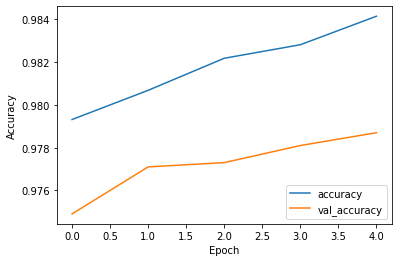

In [0]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

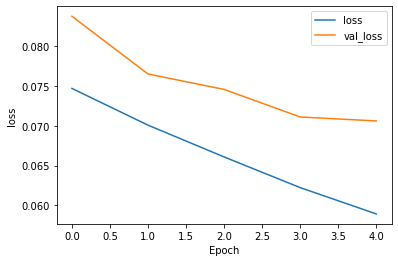

In [0]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

In [0]:
modelB.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0706 - accuracy: 0.9787


[0.07059991359710693, 0.9786999821662903]

## model B (凍結C_layer）的結果統整
> **Train accuracy**： 98%

> **Validation accuracy**： 97.8%

> **Test accuracy**： 97.8%



## fine tune
將原本的C_layer解凍進行訓練，進行微調。

參考課本的方法，降低學習率，避免損壞重用層的權重

In [0]:
for layer in C_layer:
  layer.trainable=True

In [0]:
modelB.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
history2=modelB.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
469/469 [==============================] - 22s 46ms/step - loss: 0.0521 - accuracy: 0.9865 - val_loss: 0.0672 - val_accuracy: 0.9795
Epoch 2/5
469/469 [==============================] - 22s 46ms/step - loss: 0.0518 - accuracy: 0.9865 - val_loss: 0.0671 - val_accuracy: 0.9793
Epoch 3/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0515 - accuracy: 0.9866 - val_loss: 0.0666 - val_accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0511 - accuracy: 0.9869 - val_loss: 0.0663 - val_accuracy: 0.9798
Epoch 5/5
469/469 [==============================] - 22s 46ms/step - loss: 0.0508 - accuracy: 0.9867 - val_loss: 0.0661 - val_accuracy: 0.9796


## 模型評估

In [0]:
modelB.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0661 - accuracy: 0.9796


[0.06614912301301956, 0.9796000123023987]

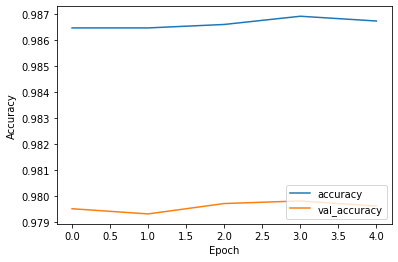

In [0]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

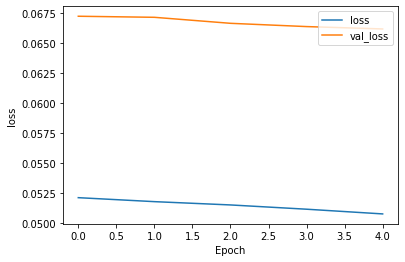

In [0]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

## model B (fine tune）的結果統整
> **Train accuracy**： 98.6%

> **Validation accuracy**： 97.9%

> **Test accuracy**： 97.9%

根據結果，當我們使用model的參數進行transfer learning時，可發現modelB（部分model的層數以及新的輸出層）在辨識mnist資料檔有相當好的正確率。

**不過我在想會不會我選擇使用的兩個資料集之間的差異過大，會使得建立的模型結果產生偏誤？**

**最理想的第二個資料集應該要是複雜版或是簡易版的fashion_mnist**